# Week 10 Problem Set

## Homeworks

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**HW0.** Do the following before starting the homework questions.

**Task 1.** Paste the following functions from your cohort sessions:
- `get_features_target()`
- `normalize_z()`
- `normalize_minmax()`
- `replace_target()`
- `split_data()`
- `prepare_feature()`
- `prepare_target()`
- `log_regression()`
- `compute_cost_logreg()`
- `gradient_descent_logreg()`
- `predict_norm()`
- `predict()`
- `confusion_matrix()`

In [252]:
def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

def normalize_z(df):
    dfout = (df - df.mean(axis=0)) / df.std(axis=0)
    return dfout

def normalize_minmax(dfin):
    dfout = (dfin-dfin.min(axis=0))/(dfin.max(axis=0)-dfin.min(axis=0))
    return dfout

def prepare_feature(df_feature): # creates X matrix
    feature = df_feature.to_numpy()
    array1 = np.ones((feature.shape[0], 1))
#     array1 = np.ones(feature.shape) --> works too
    X = np.concatenate((array1, feature), axis=1)
    return X

def prepare_target(df_target):
    return df_target.to_numpy()

def replace_target(df_target, target_name, map_vals):
    df_out = df_target.copy()
    df_out.loc[:, target_name] = df_target[target_name].apply(lambda val: map_vals[val])
    return df_out

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    # assuming that index is consistent between features and target
    indices = df_target.index
    if random_state != None:
        np.random.seed(random_state)
        
    # k is the no. of rows in the test set
    num_rows = len(indices)
    k = int(test_size * num_rows)
    # randomly choose indices for test set
    test_indices = np.random.choice(indices, k, replace=False)
    
    indices = set(indices)
    test_indices = set(test_indices)
    train_indices = indices - test_indices
    
    df_feature_train = df_feature.loc[train_indices, :]
    df_feature_test = df_feature.loc[test_indices, :]
    df_target_train = df_target.loc[train_indices, :]
    df_target_test = df_target.loc[test_indices, :]

    return df_feature_train, df_feature_test, df_target_train, df_target_test


def log_regression(beta, X):
    return 1/(1+np.exp(np.matmul(-X, beta)))

def compute_cost_logreg(beta, X, y):
    np.seterr(divide = 'ignore') 
    p = log_regression(beta,X)
    m= X.shape[0]
    J = (-1/m)*np.sum(np.where(y==1,np.log(p),np.log(1-p)))
    np.seterr(divide = 'warn')
    return J

def gradient_descent_logreg(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros(num_iters)
    for n in range(num_iters):
        p = log_regression(beta, X)
        error = p - y
        delta = np.matmul(X.T, error)
        beta = beta - (alpha / m) * delta
        # change the J value from 0 to sum cost (can also use an empty list and append to it)
        J_storage[n] = compute_cost_logreg(beta, X, y)
    return beta, J_storage

def predict_norm(X, beta):
    p = log_regression(beta, X)
    return np.where(p >= 0.5, 1, 0)

def predict(df_feature, beta):
    feature_z = normalize_z(df_feature)
    X = prepare_feature(feature_z)
    return predict_norm(X, beta)
  
import itertools
def confusion_matrix(ytrue, ypred, labels):
    output = {}
    generated_key = itertools.product([1,0],repeat = 2)
    for k in generated_key:
        print(k)
        output[k] = 0
    for idx in range(len(ytrue)):
        true_val=ytrue[idx,0]
        pred_val=ypred[idx,0]
        output[(true_val, pred_val)] += 1
    return output



**Task 2.** Load the Iris data set from `iris_data.csv` into a Data Frame. 

    

In [253]:
# read iris_data.csv
df = pd.read_csv("iris_data.csv")

###
### YOUR CODE HERE
###
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Task 3.** Do the following tasks.

- Read the following columns for the features: `'sepal_length', 'sepal_width', 'petal_length', 'petal_width'`.
- Read the column `species` for the target.
- Replace the `species` column with the following mapping:
    - `Iris-setosa`: `0`
    - `Iris-versicolor`: `1`
    - `Iris-virginica`: `2`

In [254]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# extract the features and the target
df_feature, df_target = get_features_targets(df, columns, ["species"])

# replace the target using the mapping
df_target = replace_target(df_target, "species", mapping)



In [255]:
result = np.unique(df_target['species'], return_counts=True)
assert (result[0] == [0, 1, 2]).all()
assert (result[1] == [50, 50, 50]).all()

# **HW1.** *One-vs-All target:* Write a function that takes in a target data frame and returns a new dataframe where the size of the column is the same as the number of category. The function makes use of `replace_target()` function to create one-vs-all target values. 

For example, if we have three categories of class, the columns of the returned data frame will be as follows:
- column target: this is the original target column
- column 0: the target with values of 0 will be set to 1 while the rest will be replaced with 0.
- column 1: the target with values of 1 will be set to 1 while the rest will be replaced with 0.
- column 2: the target with values of 2 will be set to 1 while while the rest will be replaced with 0.

In [256]:
# def create_onevsall_columns(df_target, col):
#     dfout = df_target.copy()
#     print(dfout)
#     print(dfout[col])
#     summ = dfout[col].nunique()
#     print(summ)
#     df_out.loc[:, target_name] = df_target[target_name].apply(lambda val: map_vals[val])
#     return df_out


        
def create_onevsall_columns(df_target, col):
    dfout = df_target.copy()
#     print("start!!",dfout,"dfout!!")
    num_classes = df_target[col].nunique()
#     print("start !!!",num_classes,"num_classes!!")
    for i in range(num_classes):
        dfout[i] = dfout[col].apply(lambda y : np.where(y == i,1,0))
#         print(dfout[i],i)
    return dfout

In [257]:
df_targets = create_onevsall_columns(df_target, 'species')
print(df_targets)
result = np.unique(df_targets['species'], return_counts=True)
assert (result[0] == [0, 1, 2]).all()
assert (result[1] == [50, 50, 50]).all()
result = np.unique(df_targets[0], return_counts=True)
assert (result[0] == [0, 1]).all()
assert (result[1] == [100, 50]).all()
result = np.unique(df_targets[1], return_counts=True)
assert (result[0] == [0, 1]).all()
assert (result[1] == [100, 50]).all()
result = np.unique(df_targets[2], return_counts=True)
assert (result[0] == [0, 1]).all()
assert (result[1] == [100, 50]).all()

     species  0  1  2
0          0  1  0  0
1          0  1  0  0
2          0  1  0  0
3          0  1  0  0
4          0  1  0  0
..       ... .. .. ..
145        2  0  0  1
146        2  0  0  1
147        2  0  0  1
148        2  0  0  1
149        2  0  0  1

[150 rows x 4 columns]


**HW2.** *Multiple features and splitting of data set:* Do the following task in the code below:
- Read the following columns for the features: `sepal_length`,`sepal_width`, `petal_length`, `petal_width` normalize it using `normalize_z()`. 
- Read `species` as the target column and use `create_onevsall_columns()` to create the additional target columns to do multi class classification.
- Split the data set with 30% test size and `random_state = 100`.
- Normalize the training feature data set using `normalize_z()` function.
- Convert to numpy array both the target and the features using `prepare_feature()` and `prepare_target()` functions.
- Call `gradient_descent()` function to get the parameters using the training data set.

In [258]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# extract the features and the target
df_features, df_target = get_features_targets(df,columns,["species"])

# change target values to integer using mapping
df_target = replace_target(df_target,"species", mapping)

# create one vs all columns for the target
df_targets = create_onevsall_columns(df_target, "species")

# split the data using random_state = 100 and 30% test size
df_features_train, df_features_test, df_targets_train, df_targets_test = split_data(df_features, df_targets, test_size=0.3, random_state=100)

# normalize the training feature
df_features_train_z = normalize_z(df_features_train)




In [259]:
assert df_features_train_z.shape == (105, 4)

assert np.isclose(df_features_train_z.min(), -2.52349).any()
assert np.isclose(df_features_train_z.max(), 2.73284).any()
assert np.isclose(df_features_train_z['sepal_width'].mean(), 0)
assert np.isclose(df_features_train_z['sepal_width'].std(), 1, atol=0.01)

assert (np.unique(df_targets_train['species']) == [0, 1, 2]).all()
assert (np.unique(df_targets_train[0]) == [0, 1]).all()
assert (np.unique(df_targets_train[1]) == [0, 1]).all()
assert (np.unique(df_targets_train[2]) == [0, 1]).all()


**HW3.** *Build Multi-class Model:* Write a function `build_model_multiclass()` which takes in the following arguments:
- `df_features`: which is a Pandas data framecontaining the features.
- `df_targets`: which is a Pandas data frame containing the target for one vs all classification. 
- `col_target`: the name of the column target in the original data frame which is also the key of the dictionary containing the original target numpy array.
- `iterations`: the number of iterations to perform the gradient descent. By default it is set to 1500.
- `alpha`: the learning rate in the gradient descent algorithm. By default it is set to 0.01.

The function should return a dictionary of dictionary. The output dictionary has the following key and values:
- key: the keys are the categories or the labels in the target.
- values: the values are another dictionary for that particular label. This dictionary has two keys: `beta` and `J_storage`, which gives the parameter value for that particular label and its cost minimization values at every iteration.

Hint:
- you need to call `prepare_feature()` and `prepare_target()` to change the Pandas data frame to Numpy arrays.
- in order to create a data frame instead of a series when accessing a column, use `df[[c]]` (will output data frame) instead of `df[c]` (will output series). 
- You need to use `normalize_minmax()` on your target before passing it on to `gradient_descent_logreg()` because the function logistic regression has the normalized value of 0 to 1 in the y axis.

In [260]:
def build_model_multiclass(df_features, df_targets, col_target, iterations=1500, alpha=0.01):
    output = {}
    
    # change the feature columns to numpy array and append column of 1s
    features = prepare_feature(df_features)
    
    # change the target column to numpy array
    
    # prepare target for every column in targets
    for column in df_targets.columns:
        if column == col_target:
            continue

        values = {}
        target = prepare_target(df_targets[[column]])
        
        target = normalize_minmax(target)

        # provide initial guess for theta
        beta = np.zeros((features.shape[1],1))

        # call the gradient descent method
        beta, J_storage = gradient_descent_logreg(features, target, beta, alpha, iterations)
    
    
        values["beta"] = beta
        values["J_storage"] = J_storage
        output[column] = values
        
    return output
    

In [261]:
output = build_model_multiclass(df_features_train_z, df_targets_train, 'species')

assert isinstance(output, dict)
expected = np.array([[ -1.0198841], [ -0.69883077], [  1.0774116], [-1.17170999], [-1.12846826]])
assert np.isclose(output[0]['beta'], expected).all()
expected = np.array([[ -0.63304937], [ 0.11684857], [-1.15346071], [ 0.18746937], [-0.14534827 ]])
assert np.isclose(output[1]['beta'], expected).all()
expected = np.array([[-1.31740148 ], [0.42271871], [0.18526839], [ 0.8831822], [1.17929455]])
assert np.isclose(output[2]['beta'], expected).all()

class model = 0 [[-1.0198841 ]
 [-0.69883077]
 [ 1.0774116 ]
 [-1.17170999]
 [-1.12846826]]
class model = 1 [[-0.63304937]
 [ 0.11684857]
 [-1.15346071]
 [ 0.18746937]
 [-0.14534827]]
class model = 2 [[-1.31740148]
 [ 0.42271871]
 [ 0.18526839]
 [ 0.8831822 ]
 [ 1.17929455]]


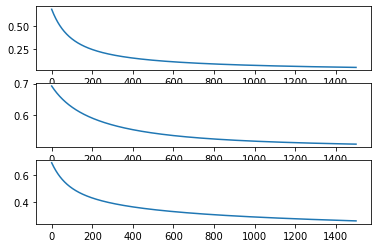

In [262]:
fig, axes = plt.subplots(len(output), 1)
idx = 0
for c in output:
    print(f'class model = {c:}', output[c]['beta'])
    axes[idx].plot(output[c]['J_storage'])
    idx += 1

**HW4.** *Predict Multi-class:* Write a function `predict_multiclass()` that takes in the data frame for the features and the parameters for the multi-class classification and return a Numpy array for the predicted target.

Recall that you need to do the following steps:
- Normalize the features and change to numpy array
- For each of the class, calculate the probability by using `log_regression()` function.
- For each record, find the class that gives the maximum probability.
- Returns a Numpy array with the predicted target values

You can use the following function in your code:
- `np.argmax()` to find the column name with the maximum value
- `df.apply(func, axis=1)`: which is to apply some function on a particular axis. Setting axis=1 means that the function is to be applied accross the columns of the data frame instead of the index or the rows. 

In [263]:
def predict_multiclass(df_features, multi_beta):
    # normalize the training feature
    df_features_z = normalize_z(df_features)
    
    features = prepare_feature(df_features_z)

    num_features = len(multi_beta)
    pred = pd.DataFrame()
    for i in range(num_features):
        beta = multi_beta[i]["beta"]
        y_pred = log_regression(beta,features).ravel()
        pred[i] = pd.Series(y_pred)
    
    pred['final'] = pred.apply(lambda x : np.argmax(x),axis = 1)
    
    
    return pred['final'].to_numpy().reshape(45,1)

In [264]:
pred = predict_multiclass(df_features_test, output)

assert isinstance(pred, np.ndarray)
assert pred.shape == (45, 1)
assert pred.min() == 0
assert pred.max() == 2
assert np.median(pred) == 1

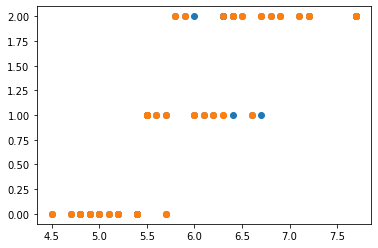

In [265]:
plt.scatter(df_features_test['sepal_length'], df_targets_test['species'])
plt.scatter(df_features_test['sepal_length'], pred)

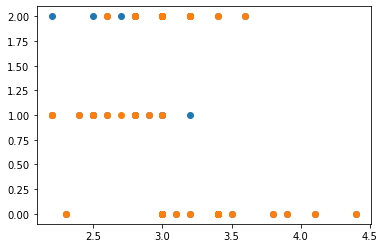

In [266]:
plt.scatter(df_features_test['sepal_width'], df_targets_test['species'])
plt.scatter(df_features_test['sepal_width'], pred)

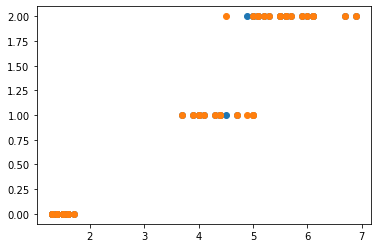

In [267]:
plt.scatter(df_features_test['petal_length'], df_targets_test['species'])
plt.scatter(df_features_test['petal_length'], pred)

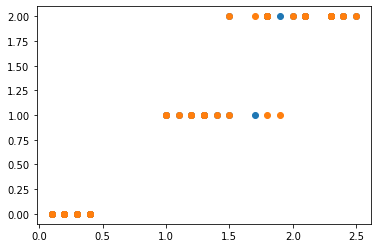

In [268]:
plt.scatter(df_features_test['petal_width'], df_targets_test['species'])
plt.scatter(df_features_test['petal_width'], pred)

**HW5.** *Confusion Matrix:* Write a function to calculate the confusion matrix for multi-class label. If you write the solution in the Cohort session properly, the solution will be the same as in the Cohort session.

Make sure that you can output a dictionary where the keys are all the combinations of all the classes: `(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)`.

In [269]:
import itertools
def confusion_matrix(ytrue, ypred, labels):
    output = {i : 0 for i in list(itertools.product(labels,repeat = 2))}
    
    for idx in range(ytrue.shape[0]):
        actual = ytrue[idx,0]
        pred = ypred[idx,0] # or using a list index ypred[idx][0]
        output[(actual,pred)] +=1

    return output


In [270]:
cm = confusion_matrix(df_targets_test.values, pred, [0, 1, 2])
print(cm)
assert cm == {(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 9, (1, 2): 2, (2, 0): 0, (2, 1): 3, (2, 2): 15}

{(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 9, (1, 2): 2, (2, 0): 0, (2, 1): 3, (2, 2): 15}


**HW6.** *Metrics:* Write a function `calc_accuracy()` that takes in a Confusion Matrix array and output a dictionary with the following keys and values:
- `accuracy`: total number of correct predictions / total number of records
- `sensitivity`: total correct positive cases / total positive cases
- `precision`: total  of correct positive cases / total predicted positive cases

For multiple classes, we can also calculate *sensitivity* and *precision* for each of the class. For example, to calculate the sensitivity for class *i*, we use:

$$\text{sensitivity}_i = \frac{M_{ii}}{\sum_j{M_{ij}}}$$

This means that we get the value at row *i* and columnn *i* which is the total correct case for class *i* and the sum over all the columns in row *i* which is the total cases for class *i*. 

Similarly, we can calculate the precision for class *i* using:

$$\text{precision}_i = \frac{M_{ii}}{\sum_j{M_{ji}}}$$

**Notice that the indices are swapped for the denominator**. For precision, we instead of summing over all the columns, we sum over all the rows in column *i* which is the total cases when class *i* is *predicted*.

The output is a dictionary with one of the keys called `accuracy` and the rest of the keys are the label for the different classes, i.e. 0, 1, and 2 in our example here. The value for `accuracy` key is a float. On the other hand, the values for the other label keys is another dictionary that has `sensitivity` and `precision` as the keys.

In [271]:
def calc_accuracy(cm, labels):
    output = {'accuracy': 0}
    
    correct_predictions = 0 
    total_predictions = 0
    for k,v in cm.items():
        if k[0] == k[1]:
            correct_predictions += v
        total_predictions += v
    output['accuracy'] = correct_predictions/total_predictions
    
    for l in labels:
        tp = cm[(l, l)]
        denom_sensititivity = 0
        denom_precision = 0
        for j in labels:
            # getting sum of the row
            denom_sensititivity += cm[(l, j)]
            # getting sum of the column
            denom_precision += cm[(j, l)]
        sensitivity = tp/denom_sensititivity
        precision = tp/denom_precision
        output[l] = {'sensitivity':sensitivity,'precision':precision}

    return output

In [272]:
metrics = calc_accuracy(cm, [0,1,2])
print(metrics)
assert np.isclose(metrics['accuracy'], 0.88888)
assert metrics[0] == {'sensitivity': 1.0, 'precision': 1.0}
assert np.isclose(metrics[0]['sensitivity'], 1.0)
assert np.isclose(metrics[0]['precision'], 1.0)
assert np.isclose(metrics[1]['sensitivity'], 0.8181818)
assert np.isclose(metrics[1]['precision'], 0.75)
assert np.isclose(metrics[2]['sensitivity'], 0.833333)
assert np.isclose(metrics[2]['precision'], 0.88235)


{'accuracy': 0.8888888888888888, 0: {'sensitivity': 1.0, 'precision': 1.0}, 1: {'sensitivity': 0.8181818181818182, 'precision': 0.75}, 2: {'sensitivity': 0.8333333333333334, 'precision': 0.8823529411764706}}


**HW7.** *Optional:* Redo the above tasks using Scikit Learn libraries. You will need to use the following:
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

You can refer to the followign discussion on the different minimization solver for `LogisticRegression()` class.
- [Stack overflow - logistic regression python solvers' defintions](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [274]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# get the features and the columns
df_features = None

# replace target values with integers using the mapping
df_target = None


###
### YOUR CODE HERE
###


In [275]:
# split data set using random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# change feature to numpy array and append column of 1s
feature = None

# change target to numpy array
target = None

###
### YOUR CODE HERE
###


In [276]:
# create LogisticRegression object instance
# set solver to 'newton-cg' and multi_class to 'auto'
model = None

# build model
pass

# get predicted value
pred = None

###
### YOUR CODE HERE
###


In [277]:
# calculate confusion matrix
cm = None

###
### YOUR CODE HERE
###
print(cm)


None


In [278]:
expected = np.array([[16,  0,  0], [ 0, 11,  0], [ 0,  1, 17]])
assert (cm == expected).all()

AssertionError: 

In [ ]:
plt.scatter(df_features_test["sepal_width"], df_target_test)
plt.scatter(df_features_test["sepal_width"], pred)

In [ ]:
plt.scatter(df_features_test["sepal_length"], df_target_test)
plt.scatter(df_features_test["sepal_length"], pred)

In [ ]:
plt.scatter(df_features_test["petal_width"], df_target_test)
plt.scatter(df_features_test["petal_width"], pred)

In [ ]:
plt.scatter(df_features_test["petal_length"], df_target_test)
plt.scatter(df_features_test["petal_length"], pred)